In [47]:
from google.colab import files

files.upload()

Saving heart.csv to heart (1).csv


{'heart.csv': b'Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease\n40,M,ATA,140,289,0,Normal,172,N,0,Up,0\n49,F,NAP,160,180,0,Normal,156,N,1,Flat,1\n37,M,ATA,130,283,0,ST,98,N,0,Up,0\n48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1\n54,M,NAP,150,195,0,Normal,122,N,0,Up,0\n39,M,NAP,120,339,0,Normal,170,N,0,Up,0\n45,F,ATA,130,237,0,Normal,170,N,0,Up,0\n54,M,ATA,110,208,0,Normal,142,N,0,Up,0\n37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1\n48,F,ATA,120,284,0,Normal,120,N,0,Up,0\n37,F,NAP,130,211,0,Normal,142,N,0,Up,0\n58,M,ATA,136,164,0,ST,99,Y,2,Flat,1\n39,M,ATA,120,204,0,Normal,145,N,0,Up,0\n49,M,ASY,140,234,0,Normal,140,Y,1,Flat,1\n42,F,NAP,115,211,0,ST,137,N,0,Up,0\n54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0\n38,M,ASY,110,196,0,Normal,166,N,0,Flat,1\n43,F,ATA,120,201,0,Normal,165,N,0,Up,0\n60,M,ASY,100,248,0,Normal,125,N,1,Flat,1\n36,M,ATA,120,267,0,Normal,160,N,3,Flat,1\n43,F,TA,100,223,0,Normal,142,N,0,Up,0\n44,M,ATA,120,184,0

In [48]:
import pandas as pd

df_sample1=pd.read_csv('heart.csv')

In [49]:
df_sample1.head

df_sample1.columns.values

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'], dtype=object)

In [50]:

df_sample1.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [51]:
#We Code the categorical variable and the numericals ones

cvar_list=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
nvar_list=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [52]:
df_sample1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [53]:
df_sample2 = df_sample1.copy()
## df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.

df_sample4 = df_sample3.copy()
df_sample4 = pd.get_dummies(df_sample3, prefix_sep='_')

print(df_sample4.columns.values)

['Age' 'RestingBP' 'Cholesterol' 'MaxHR' 'Oldpeak' 'Sex_F' 'Sex_M'
 'ChestPainType_ASY' 'ChestPainType_ATA' 'ChestPainType_NAP'
 'ChestPainType_TA' 'FastingBS_0' 'FastingBS_1' 'RestingECG_LVH'
 'RestingECG_Normal' 'RestingECG_ST' 'ExerciseAngina_N' 'ExerciseAngina_Y'
 'ST_Slope_Down' 'ST_Slope_Flat' 'ST_Slope_Up' 'HeartDisease_0'
 'HeartDisease_1']


In [54]:
rdummies=['Sex_M','ChestPainType_TA','RestingECG_ST','FastingBS_1','ExerciseAngina_Y','ST_Slope_Up','HeartDisease_0']

In [55]:
df_sample5 = df_sample4.copy()

#We get rid of the redundant dummies

df_sample5 = df_sample4.drop(columns=rdummies)

print(df_sample5.columns.values)


print(df_sample5)
print(df)

['Age' 'RestingBP' 'Cholesterol' 'MaxHR' 'Oldpeak' 'Sex_F'
 'ChestPainType_ASY' 'ChestPainType_ATA' 'ChestPainType_NAP' 'FastingBS_0'
 'RestingECG_LVH' 'RestingECG_Normal' 'ExerciseAngina_N' 'ST_Slope_Down'
 'ST_Slope_Flat' 'HeartDisease_1']
      Age  RestingBP  Cholesterol  ...  ST_Slope_Down  ST_Slope_Flat  HeartDisease_1
0    40.0      140.0        289.0  ...              0              0               0
1    49.0      160.0        180.0  ...              0              1               1
2    37.0      130.0        283.0  ...              0              0               0
3    48.0      138.0        214.0  ...              0              1               1
4    54.0      150.0        195.0  ...              0              0               0
..    ...        ...          ...  ...            ...            ...             ...
913  45.0      110.0        264.0  ...              0              1               1
914  68.0      144.0        193.0  ...              0              1          

In [56]:

#We will part the date and allocate 20% of the data to the training partition
#To do it we import Sklearn
from sklearn.model_selection import train_test_split

df4partition = df_sample5
testpart_size = 0.2


df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

      Age  RestingBP  Cholesterol  ...  ST_Slope_Down  ST_Slope_Flat  HeartDisease_1
852  43.0      120.0        177.0  ...              0              1               1
121  52.0      125.0        272.0  ...              0              0               0
664  65.0      150.0        225.0  ...              0              1               1
187  41.0      120.0        237.0  ...              0              1               1
108  50.0      140.0        129.0  ...              0              0               0
..    ...        ...          ...  ...            ...            ...             ...
767  54.0      108.0        267.0  ...              0              0               0
72   52.0      120.0        182.0  ...              0              1               1
908  63.0      140.0        187.0  ...              0              0               1
235  39.0      120.0        200.0  ...              0              1               0
37   41.0      110.0        250.0  ...              0            

In [57]:
#After the partition we see that the remaining 80 % of the data are 734 observations
#We then want to use the test data for the classification tree

from sklearn.tree import DecisionTreeClassifier

#We define the dependent variable which is Heart Disease_1

DV='HeartDisease_1'

y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile


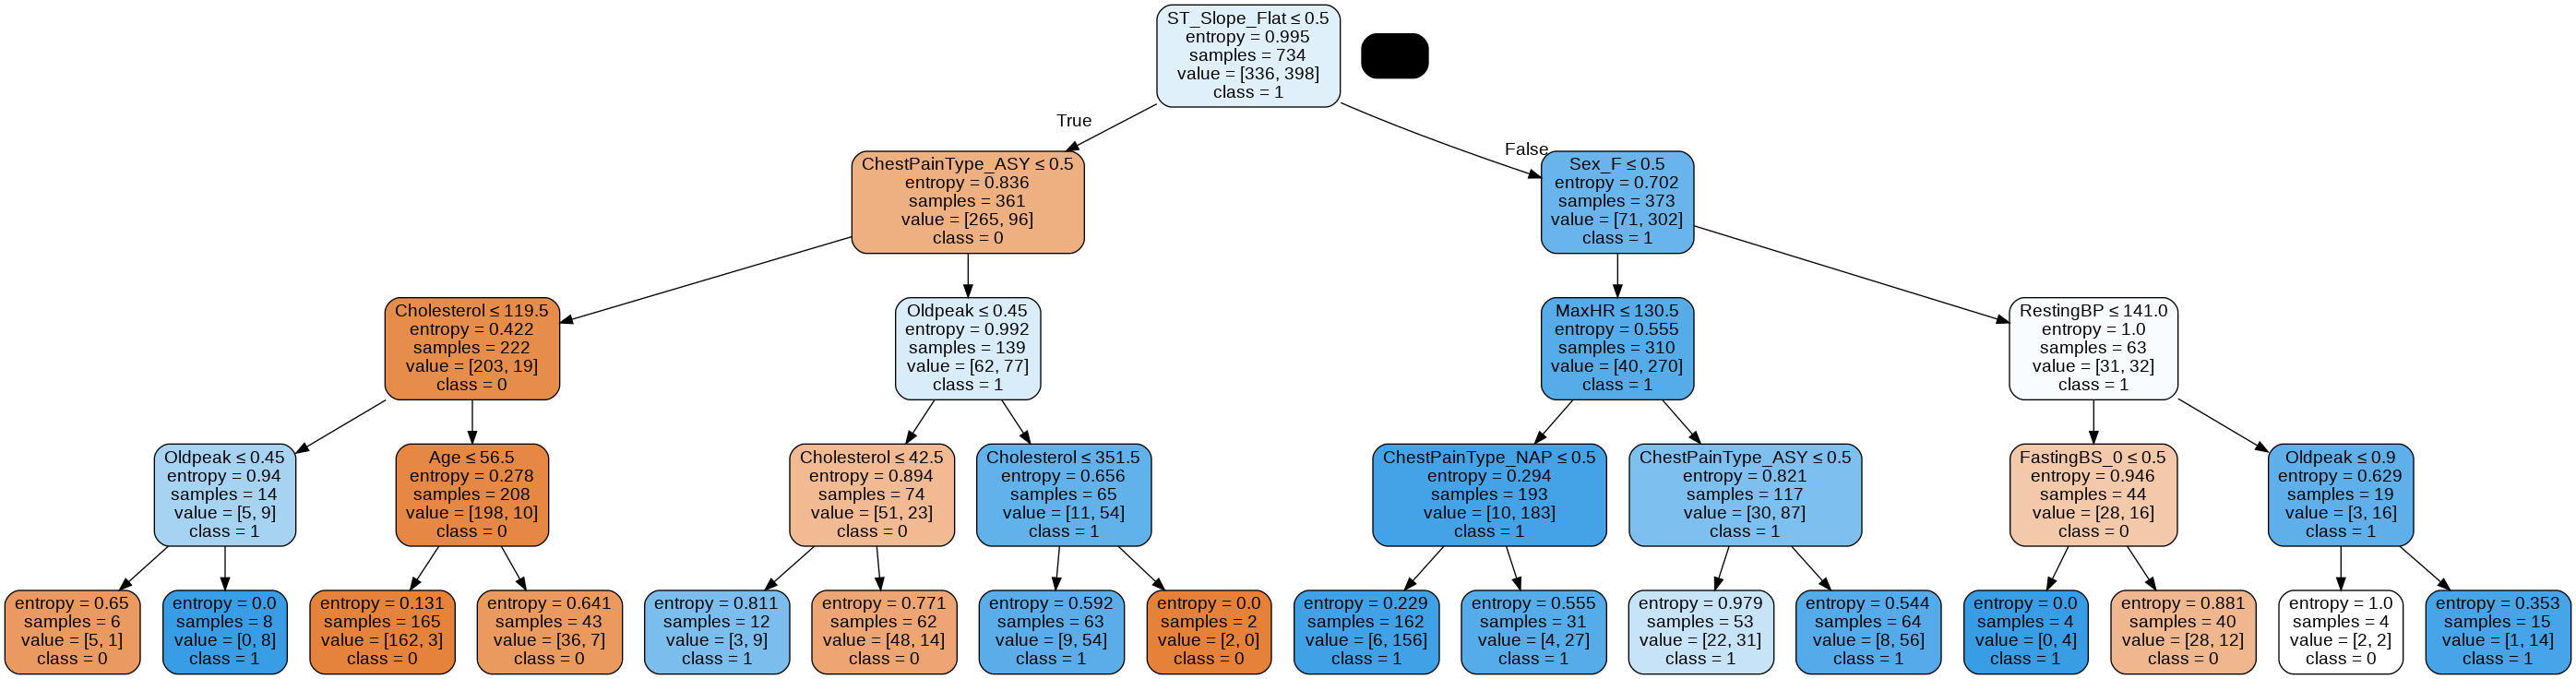

In [58]:
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

In [59]:
# We get the depth of the classification tree as the depth allows us to assess the complexity of the model
print(clf_BPT.get_depth())

y_test_actual = df_testData[DV]

X_test = df_testData.drop(columns=[DV])

# We get the AUC for the classifcation tree
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))


4
0.9453316953316954


In [60]:
#We can see that we have a depth of 4 and an AUC of 0.94 which is a significant coverage


import numpy as np



def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['ST_Slope_Flat <= 0.5', 'ChestPainType_ASY <= 0.5', 'Cholesterol <= 119.5', 'Oldpeak <= 0.44999999552965164']
sample = 6
value = [5, 1]
class =  0

Leaf node ID = 2
Path = ['ST_Slope_Flat <= 0.5', 'ChestPainType_ASY <= 0.5', 'Cholesterol <= 119.5', 'Oldpeak > 0.44999999552965164']
sample = 8
value = [0, 8]
class =  1

Leaf node ID = 3
Path = ['ST_Slope_Flat <= 0.5', 'ChestPainType_ASY <= 0.5', 'Cholesterol > 119.5', 'Age <= 56.5']
sample = 165
value = [162, 3]
class =  0

Leaf node ID = 4
Path = ['ST_Slope_Flat <= 0.5', 'ChestPainType_ASY <= 0.5', 'Cholesterol > 119.5', 'Age > 56.5']
sample = 43
value = [36, 7]
class =  0

Leaf node ID = 5
Path = ['ST_Slope_Flat <= 0.5', 'ChestPainType_ASY > 0.5', 'Oldpeak <= 0.45000000298023224', 'Cholesterol <= 42.5']
sample = 12
value = [3, 9]
class =  1

Leaf node ID = 6
Path = ['ST_Slope_Flat <= 0.5', 'ChestPainType_ASY > 0.5', 'Oldpeak <= 0.45000000298023224', 'Cholesterol > 42.5']
sample = 62
value = [48, 14]
class =  0